In [ ]:
# initialize stuff
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import importlib

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

sys.path.append("/Users/oliver/Documents/p5control-bluefors-evaluation")
sys.path.append("/home/oliver/Documents/p5control-bluefors-evaluation")

from utilities.corporate_design_colors_v4 import cmap
importlib.reload(sys.modules["utilities.corporate_design_colors_v4"])

import utilities.basefunctions
importlib.reload(sys.modules["utilities.basefunctions"])

from scipy.constants import e, h
G_0 = 2 * e**2 / h

# Test Dynes Model

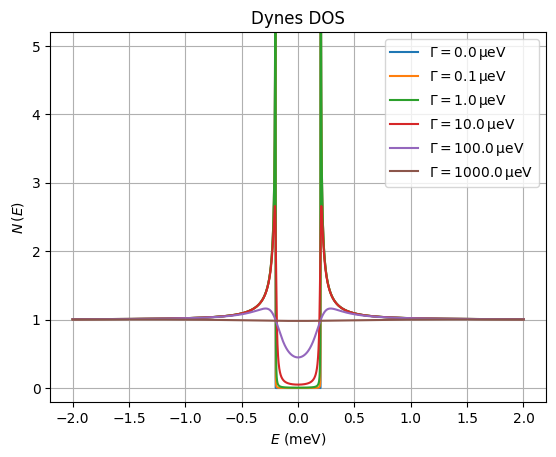

In [ ]:
# Densits of States
%matplotlib inline
from theory.model.dynes.dynes_np import density_of_states
importlib.reload(sys.modules["theory.models.dynes.dynes_np"])

Delta_eV = 2.0e-4
E = np.arange(-10*Delta_eV, 10*Delta_eV+1e-6, 1e-6)

for Gamma_eV in [1e-10, 1e-7,1e-6, 10e-6, 100e-6, 1000e-6]:
    plt.plot(E * 1e3, density_of_states(E, Delta_eV=Delta_eV, Gamma_eV=Gamma_eV), label=f"$\\Gamma = {Gamma_eV*1e6:.1f}\\,$µeV")   

plt.title("Dynes DOS")
plt.xlabel("$E$ (meV)")
plt.ylabel("$N\\,(E)$")
plt.ylim(-.2,5.2)
plt.grid(True)
plt.legend()

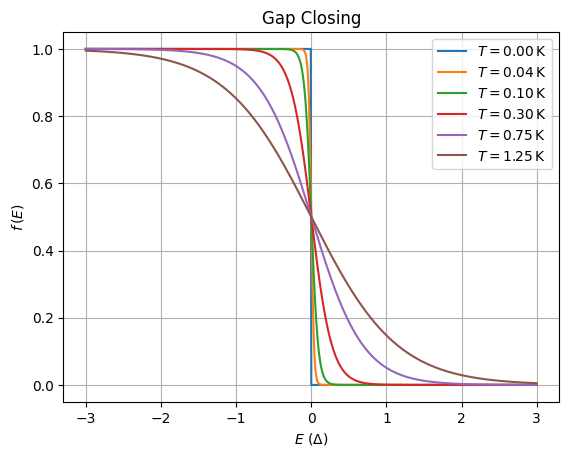

In [12]:
# Gap Closing
%matplotlib inline
from theory.dynes.dynes import fermi_distribution
importlib.reload(sys.modules["theory.dynes.dynes"])

Delta = 189e-6
E = np.linspace(-3*Delta, 3*Delta, 1001)

for T_K in [0, 0.04, .1, .3, .75, 1.25]:
    plt.plot(E / Delta, fermi_distribution(E, T_K=T_K), label=f"$T = {T_K:.2f}\\,$K")

plt.title("Gap Closing")
plt.xlabel("$E$ ($\\Delta$)")
plt.ylabel("$f\\,(E)$")
plt.grid(True)
plt.legend()

In [17]:
# Fermi-Dirac Distribution
%matplotlib inline
from theory.dynes.dynes import relative_energy_gap
importlib.reload(sys.modules["theory.dynes.dynes"])

T_K = np.linspace(0, 1.5, 1500)
Delta_eV = [180e-6, 189e-6, 191e-6, 200e-6] #V

for Delta in Delta_eV:
    rel_gap = []
    for T in T_K:
        rel_gap.append(relative_energy_gap(Delta, T))
    rel_gap = np.array(rel_gap)/Delta
    plt.plot(T_K, rel_gap, label=f'$\\Delta_0 = {int(Delta*1e6)}\\,$µeV')

plt.title("Fermi-Dirac Distribution")
plt.xlabel("$T$ (K)")
plt.ylabel("$\\Delta\\,(T) / \\Delta_0$")
plt.grid(True)
plt.legend()

[autoreload of theory.dynes.dynes failed: Traceback (most recent call last):
  File "/Users/oliver/Documents/p5control-bluefors-evaluation/.venv/lib/python3.13/site-packages/IPython/extensions/autoreload.py", line 325, in check
    superreload(m, reload, self.old_objects)
    ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/oliver/Documents/p5control-bluefors-evaluation/.venv/lib/python3.13/site-packages/IPython/extensions/autoreload.py", line 580, in superreload
    module = reload(module)
  File "/Users/oliver/.pyenv/versions/3.13.3/lib/python3.13/importlib/__init__.py", line 129, in reload
    _bootstrap._exec(spec, module)
    ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 866, in _exec
  File "<frozen importlib._bootstrap_external>", line 1022, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1160, in get_code
  File "<frozen importlib._bootstrap_external>", line 1090, in source_to_code
  File "<frozen importlib._bootstrap>",

IndentationError: expected an indented block after 'if' statement on line 41 (dynes.py, line 46)

In [17]:
# Dynes
%matplotlib qt
from theory.dynes.dynes import get_current_dynes
importlib.reload(sys.modules["theory.dynes.dynes"])

V_mV = np.linspace(-1.2, 1.2, 2401)
energy_gap_eV = 200e-6
transmission = 1
T_K = [0]
Gamma_eV = [0, 1e-6, 2e-6]

fig, [ax0, ax1] = plt.subplots(2,1, height_ratios=[3, 2])

for T in T_K:
    for Gamma in Gamma_eV:
        current_nA = get_current_dynes(
            voltage_mV=V_mV,
            energy_gap_eV=energy_gap_eV,
            transmission=transmission,
            temperature_K=T,
            dynes_parameter_eV=Gamma,
            thermal_energy_gap=False,
            min_dynes_paramter_eV=1e-7
        )
        ax0.plot(V_mV, current_nA,label=f"$T={T}\\,$K, $\\Gamma={int(Gamma*1e6)}\\,$µeV")

        conductance = np.gradient(current_nA, V_mV) * 1e-6 / G_0
        ax1.plot(V_mV, conductance)

plt.figure(1)
fig.suptitle("Dynes Model")
ax0.set_ylabel(r'$I$ (nA)')
ax1.set_ylabel(r'd$I/$d$V$ ($G_0$)')
ax1.set_xlabel("$V$ (µV)")
ax0.grid()
ax1.grid()
ax0.legend()

ax1.set_ylim(-.1, 2.5)


/Users/oliver/Documents/p5control-bluefors-evaluation/theory/dynes/dynes.py:29: UserWarning: Dynes parameter Γ = 0.0e+00 eV is below threshold; using 1.0e-07 eV instead.
  warnings.warn(


(-0.1, 2.5)

In [12]:
# conductance over voltage and temperature
%matplotlib inline
from theory.dynes.dynes import get_current_dynes
importlib.reload(sys.modules["theory.dynes.dynes"])

voltage_mV = np.linspace(-2.2, 2.2, 2201)
temperature_K = np.linspace(0, 1.5, 150+1)

energy_gap_eV = 189e-6
transmission = 1
dynes_parameter_eV = 1e-6 #20e-6

conductance = np.empty((temperature_K.shape[0], voltage_mV.shape[0]))

for i, T_K in enumerate(tqdm(temperature_K)):
    current_nA = get_current_dynes(
        voltage_mV=voltage_mV,
        energy_gap_eV=energy_gap_eV,
        transmission = transmission,
        temperature_K = T_K,
        dynes_parameter_eV=dynes_parameter_eV,
    )
    conductance[i, :] = np.gradient(current_nA, voltage_mV) * 1e-6 / G_0


100%|██████████| 151/151 [00:35<00:00,  4.30it/s]


In [9]:
# show conductance over voltage and termperature
%matplotlib qt
z = conductance
x = voltage_mV
y = temperature_K

dx, dy = x[-1]-x[-2], y[-1]-y[-2]
ext = (x[0]-dx/2, x[-1]+dx/2, y[0]-dy/2, y[-1]+dy/2)
clim = (np.nanmean(z)-2*np.nanstd(z), np.nanmean(z)+2*np.nanstd(z))
clim = (0, 2*transmission)

fig, ax = plt.subplots()
im = ax.imshow(
    z, 
    aspect='auto', 
    origin='lower', 
    clim=clim, 
    extent=ext, 
    interpolation=None,
    cmap=cmap(bad="red"),
    )
ax.tick_params(
        direction='in',       # Ticks nach innen
        top=True,             # obere Ticks ein
        bottom=True,          # untere Ticks ein
        left=True,            # linke Ticks ein
        right=True,           # rechte Ticks ein
        which='both'          # sowohl Major- als auch Minor-Ticks
    )
cbar = fig.colorbar(im)
cbar.set_label(r'd$I/$d$V$ ($G_0$)', labelpad=10, loc="center")
ax.set_ylabel(r'$T$ (K)')
ax.set_xlabel(r'$eV_0$ (meV)')

Text(0.5, 0, '$eV_0$ (meV)')

In [10]:
# conductance over voltage and dynes parameter
%matplotlib inline
from theory.dynes.dynes import get_current_dynes
importlib.reload(sys.modules["theory.dynes.dynes"])

voltage_mV = np.linspace(-.6, .6, 601)
dynes_parameter_eV = np.linspace(0, 400e-6, 200+1)

energy_gap_eV = 189e-6
transmission = 1
temperature_K = 0

conductance = np.empty((dynes_parameter_eV.shape[0], voltage_mV.shape[0]))

for i, Gamma in enumerate(tqdm(dynes_parameter_eV)):
    current_nA = get_current_dynes(
        voltage_mV=voltage_mV,
        energy_gap_eV=energy_gap_eV,
        transmission = transmission,
        temperature_K = temperature_K,
        dynes_parameter_eV=Gamma,
    )
    conductance[i, :] = np.gradient(current_nA, voltage_mV) * 1e-6 / G_0


  0%|          | 0/201 [00:00<?, ?it/s]/Users/oliver/Documents/p5control-bluefors-evaluation/theory/dynes/dynes.py:29: UserWarning: Dynes parameter Γ = 0.0e+00 eV is below threshold; using 5.0e-07 eV instead.
  warnings.warn(
100%|██████████| 201/201 [00:12<00:00, 15.65it/s]


Text(0.5, 0, '$eV_0$ (meV)')

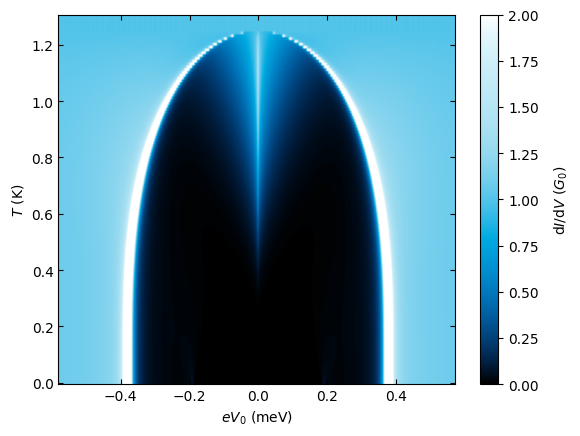

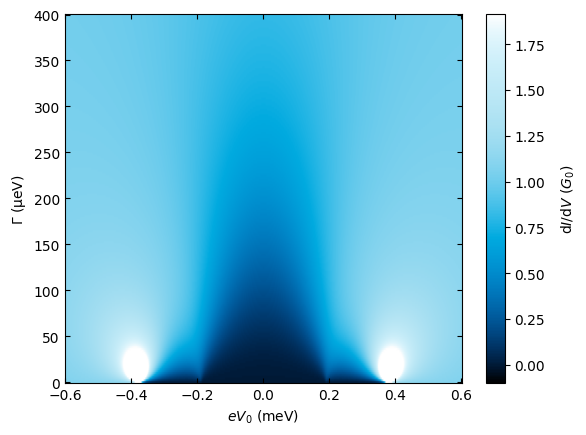

In [11]:
# show conductance over voltage and dynes parameter
%matplotlib inline
z = conductance
x = voltage_mV
y = dynes_parameter_eV * 1e6

dx, dy = x[-1]-x[-2], y[-1]-y[-2]
ext = (x[0]-dx/2, x[-1]+dx/2, y[0]-dy/2, y[-1]+dy/2)
clim = (np.nanmean(z)-2*np.nanstd(z), np.nanmean(z)+2*np.nanstd(z))
# clim = (0, 2*transmission)

fig, ax = plt.subplots()
im = ax.imshow(
    z, 
    aspect='auto', 
    origin='lower', 
    clim=clim, 
    extent=ext,
    interpolation=None,
    cmap=cmap(bad="grey"),
    )
ax.tick_params(
        direction='in',       # Ticks nach innen
        top=True,             # obere Ticks ein
        bottom=True,          # untere Ticks ein
        left=True,            # linke Ticks ein
        right=True,           # rechte Ticks ein
        which='both'          # sowohl Major- als auch Minor-Ticks
    )
cbar = fig.colorbar(im)
cbar.set_label(r'd$I/$d$V$ ($G_0$)', labelpad=10, loc="center")
ax.set_ylabel(r'$\Gamma$ (µeV)')
ax.set_xlabel(r'$eV_0$ (meV)')

In [9]:

from theory.carlosha.ha import get_current_ha
importlib.reload(sys.modules["theory.carlosha.ha"])

from theory.carlosfcs.fcs import get_current_fcs
importlib.reload(sys.modules["theory.carlosfcs.fcs"])

from theory.dynes.dynes import get_current_dynes
importlib.reload(sys.modules["theory.dynes.dynes"])

def get_current(
    voltage_mV: np.ndarray,
    energy_gap_V: float = 2e-4,
    transmission: float | np.ndarray = 0.5,
    temperature_K: float = 0.0,
    dynes_parameter_V: float = 0.0,
    model: str = "ha",
) -> np.ndarray:
    
    if type(transmission) is not np.ndarray:
        transmission = np.full((1), transmission)

    all_currents_nA = np.full((transmission.shape[0], voltage_mV.shape[0]), np.nan)

    for i, tau in enumerate(transmission):
        match model:
            case "dynes":
                all_currents_nA[i,:] = get_current_dynes(
                    voltage_mV=voltage_mV,
                    energy_gap_eV=energy_gap_V,
                    transmission=tau,
                    dynes_parameter_eV=dynes_parameter_V,
                )
            case "ha":
                all_currents_nA[i,:] = get_current_ha(
                    voltage_mV=voltage_mV,
                    energy_gap_V=energy_gap_V,
                    transmission=tau,
                    temperature_K=temperature_K,
                )
            case "fcs":
                tmp_current = get_current_fcs(
                    voltage_mV=voltage_mV,
                    energy_gap_V=energy_gap_V,
                    transmission=tau,
                    temperature_K=temperature_K,
                )
                all_currents_nA[i,:] = np.sum(tmp_current, axis=1)
            case _:
                raise ValueError(f"Unknown model: {model}")
    return all_currents_nA

In [2]:
from theory.dynes.dynes import get_current_dynes
importlib.reload(sys.modules["theory.dynes.dynes"])
from theory.dynes.dynes_jax import get_current_dynes as get_current_dynes_jax
importlib.reload(sys.modules["theory.dynes.dynes_jax"])
from time import time

voltage_mV = np.linspace(-1, 1, 1001)
temperature_K = 0
energy_gap_eV = 189e-6
transmission = 1
dynes_parameter_eV = 1e-8
min_dynes_paramter_eV = 1e-8

# tic = time()
# current_nA = get_current_dynes(
#     voltage_mV=voltage_mV,
#     energy_gap_eV=energy_gap_eV,
#     transmission = transmission,
#     temperature_K = temperature_K,
#     dynes_parameter_eV=dynes_parameter_eV,
#     min_dynes_paramter_eV= min_dynes_paramter_eV,
# )
# conductance_nA = np.gradient(current_nA, voltage_mV)*1e-6 / G_0
# print(time()-tic)

tic = time()
current_nA_jax = get_current_dynes_jax(
    voltage_mV=voltage_mV,
    energy_gap_eV=np.array([energy_gap_eV, energy_gap_eV]),
    transmission = transmission,
    temperature_K = temperature_K,
    dynes_parameter_eV=np.array([dynes_parameter_eV, dynes_parameter_eV]),
    min_dynes_paramter_eV = min_dynes_paramter_eV,
)
conductance_jax = np.gradient(current_nA_jax, voltage_mV) / G_0 * 1e-6
print(time()-tic)

3.535106897354126


In [3]:
%matplotlib qt
# plt.plot(voltage_mV, conductance_nA)
plt.semilogy(voltage_mV, conductance_jax)